## Analisis Faktor Kepuasan Pelanggan terhadap Produk Nike dan Adidas dengan Decision Tree dan Random Forest
#### Kelompok 2
1. Kelly Mae (00000051428)
2. Fareza Ananda Putra (00000051475)
3. Leony Hana Noah Zebua (00000042544)
4. Reuben Ryan Peter (00000043424)

### Import Library

In [1]:
import pandas as pd # Data Analysis and Data Manipulation
import matplotlib.pyplot as plt # Data Visualization
import seaborn as sns # Data Visualization

from sklearn.preprocessing import StandardScaler # Data Prepocessing
from sklearn.model_selection import train_test_split # Data Splitting
from sklearn.tree import DecisionTreeClassifier # Decision Tree
from sklearn.ensemble import RandomForestClassifier # Random Forest
from sklearn.tree import plot_tree # Decision Tree Plot
from sklearn import metrics # Evaluation Metrics
from sklearn.metrics import classification_report, plot_confusion_matrix, accuracy_score # Evaluation Metrics

### Data Exploration and Understanding

In [2]:
# Import Data
nikeAdidas = pd.read_csv("Adidas Vs Nike.csv", header = 0)

# Read Data Structure
nikeAdidas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3268 entries, 0 to 3267
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Product Name   3268 non-null   object 
 1   Product ID     3268 non-null   object 
 2   Listing Price  3268 non-null   int64  
 3   Sale Price     3268 non-null   int64  
 4   Discount       3268 non-null   int64  
 5   Brand          3268 non-null   object 
 6   Description    3265 non-null   object 
 7   Rating         3268 non-null   float64
 8   Reviews        3268 non-null   int64  
 9   Last Visited   3268 non-null   object 
dtypes: float64(1), int64(4), object(5)
memory usage: 255.4+ KB


In [3]:
# View Data
nikeAdidas

,Product Name,Product ID,Listing Price,Sale Price,Discount,Brand,Description,Rating,Reviews,Last Visited
0,Women's adidas Originals NMD_Racer Primeknit S...,AH2430,14999,7499,50,Adidas Adidas ORIGINALS,Channeling the streamlined look of an '80s rac...,4.8,41,2020-04-13T15:06:14
1,Women's adidas Originals Sleek Shoes,G27341,7599,3799,50,Adidas ORIGINALS,"A modern take on adidas sport heritage, tailor...",3.3,24,2020-04-13T15:06:15
2,Women's adidas Swim Puka Slippers,CM0081,999,599,40,Adidas CORE / NEO,These adidas Puka slippers for women's come wi...,2.6,37,2020-04-13T15:06:15
3,Women's adidas Sport Inspired Questar Ride Shoes,B44832,6999,3499,50,Adidas CORE / NEO,"Inspired by modern tech runners, these women's...",4.1,35,2020-04-13T15:06:15
4,Women's adidas Originals Taekwondo Shoes,D98205,7999,3999,50,Adidas ORIGINALS,This design is inspired by vintage Taekwondo s...,3.5,72,2020-04-13T15:06:15
...,...,...,...,...,...,...,...,...,...,...
3263,Air Jordan 8 Retro,CI1236-100,15995,12797,0,Nike,The Air Jordan 8 Retro recaptures the memorabl...,5.0,1,2020-04-13T15:41:01
3264,Nike Phantom Venom Club IC,AO0578-717,4995,3497,0,Nike,The Nike Phantom Venom Club IC is engineered f...,0.0,0,2020-04-13T15:41:03
3265,Nike Mercurial Superfly 7 Academy TF,AT7978-414,8495,5947,0,Nike,The soft upper of the Nike Mercurial Superfly ...,5.0,1,2020-04-13T15:41:07
3266,Nike Air Max 98,AH6799-300,0,16995,0,Nike,The Nike Air Max 98 features the OG design lin...,4.0,4,2020-04-13T15:41:19


Adapun pembacaan data dengan bentuk csv menggunakan fungsi <i>pd.read_csv()</i> yang akan dimasukkan ke dalam variabel yang bernama <b>nikeAdidas</b>. 

Kemudian terdapat tampilan struktur data dengan fungsi <i>info()</i> dimana terlihat bahwa data terdiri dari 3268 baris dan 10 kolom. Adapun berbagai variabel dalam data yang terdiri dari <i>int</i>, <i>float</i>, dan <i>string</i>.

In [4]:
# Product Rating Descriptive Statistics
nikeAdidas[["Rating"]].describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Rating,3268.0,3.242105,1.428856,0.0,2.6,3.5,4.4,5.0


In [5]:
# Check Missing Value
print(nikeAdidas.isnull().sum())

Product Name     0
Product ID       0
Listing Price    0
Sale Price       0
Discount         0
Brand            0
Description      3
Rating           0
Reviews          0
Last Visited     0
dtype: int64


Adapun proses pengecekan <i>missing value</i> dengan menggunakan fungsi <i>isnull()</i>. Dari informasi di atas, dapat diketahui bahwa data tersebut tidak memiliki <i>missing value</i> dalam baris dan kolom.

In [6]:
# Brand Grouping
brandGroup = nikeAdidas.groupby('Brand')

# Nike
nike = brandGroup.get_group('Nike')

# Adidas
originals = brandGroup.get_group('Adidas ORIGINALS')
neo = brandGroup.get_group('Adidas CORE / NEO')
sports = brandGroup.get_group('Adidas SPORT PERFORMANCE')
type = [originals, neo, sports]

adidas = pd.concat(type)
adidas.reset_index(inplace = True, drop = True)

Adapun pengelompokkan produk berdasarkan <i>brand</i> tersendiri menggunakan fungsi <i>groupby()</i> dan pemerolehan grup dengan fungsi <i>get_group()</i>. Adapun penggabungan data berbagai produk Adidas yang disimpan ke dalam variabel Adidas dengan fungsi <i>concat()</i> dan penghapusan indeks dengan fungsi <i>reset_index()</i>.

### Data Filtering and Cleansing

In [7]:
# Filter Product Rating
def ratingCategory(x):
    if x <= 4:
        return "Bad"
    else:
        return "Good"
    
nikeAdidas["Rating"] = nikeAdidas["Rating"].apply(ratingCategory)

Adapun data <i>product rating</i> yang disederhanakan oleh karena tipe datanya yang bersifat numerikal guna memudahkan proses analisis data. Oleh karena itu, data dapat disederhanakan menjadi "<i>Bad</i>" dan "<i>Good</i>" dengan menggunakan fungsi tertentu.

Dalam hal ini "<i>Bad</i>" ditujukan pada <i>product rating</i> <= 4, sedangkan "<i>Good</i>" ditujukan pada <i>product rating</i> > 4.

In [8]:
# Drop Unneccessary Columns
nikeAdidas = nikeAdidas.drop(columns=["Brand","Description","Last Visited","Product Name","Product ID"])

In [9]:
# View Data Structure
nikeAdidas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3268 entries, 0 to 3267
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Listing Price  3268 non-null   int64 
 1   Sale Price     3268 non-null   int64 
 2   Discount       3268 non-null   int64 
 3   Rating         3268 non-null   object
 4   Reviews        3268 non-null   int64 
dtypes: int64(4), object(1)
memory usage: 127.8+ KB


In [10]:
# View Data Header
nikeAdidas.head(10)

,Listing Price,Sale Price,Discount,Rating,Reviews
0,14999,7499,50,Good,41
1,7599,3799,50,Bad,24
2,999,599,40,Bad,37
3,6999,3499,50,Good,35
4,7999,3999,50,Bad,72
5,4799,1920,60,Bad,45
6,4799,2399,50,Good,2
7,999,599,40,Bad,7
8,5599,2799,50,Good,16
9,6599,3959,40,Bad,39


### Data Visualization

#### 1. Brand Group

C:\Users\Acer\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Products Offered by Brands')

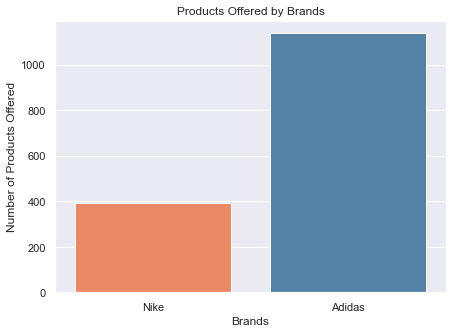

In [11]:
# Distribution of Products Offered by Brands
nk = nike['Product Name'].value_counts().count()
ad = adidas['Product Name'].value_counts().count()

product = [nk, ad]
brand = ['Nike', 'Adidas']
cols = ['coral', 'steelblue']

sns.set(rc = {'figure.figsize':(7,5)})
sns.barplot(brand, product, palette = cols).set(xlabel = 'Brands', ylabel = 'Number of Products Offered')
plt.title('Products Offered by Brands')

#### 2. Common Products

##### a. Nike

C:\Users\Acer\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


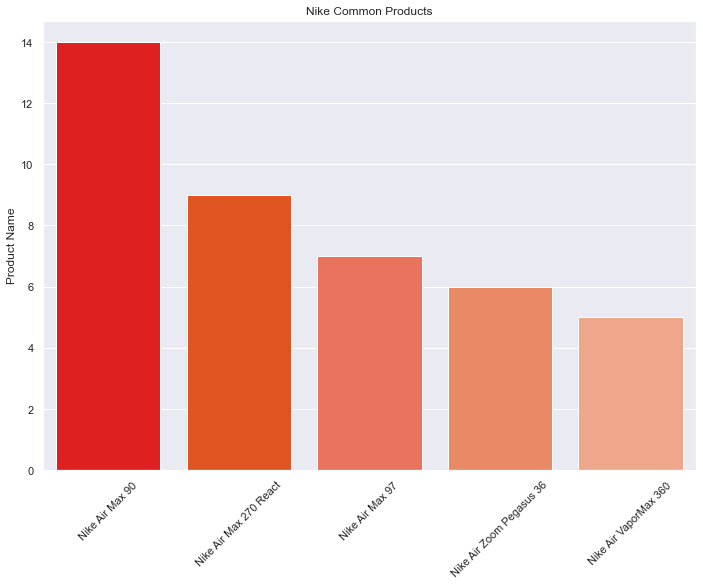

In [12]:
# Distribution of Nike Common Products
nikeProducts = nike['Product Name'].value_counts().head(5)

cols = ['red','orangered', 'tomato', 'coral', 'lightsalmon']

sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.barplot(nikeProducts.index, nikeProducts, palette = cols).tick_params(axis = 'x', rotation = 45)
plt.title('Nike Common Products')
sns.set_theme(style='whitegrid')

##### b. Adidas

C:\Users\Acer\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


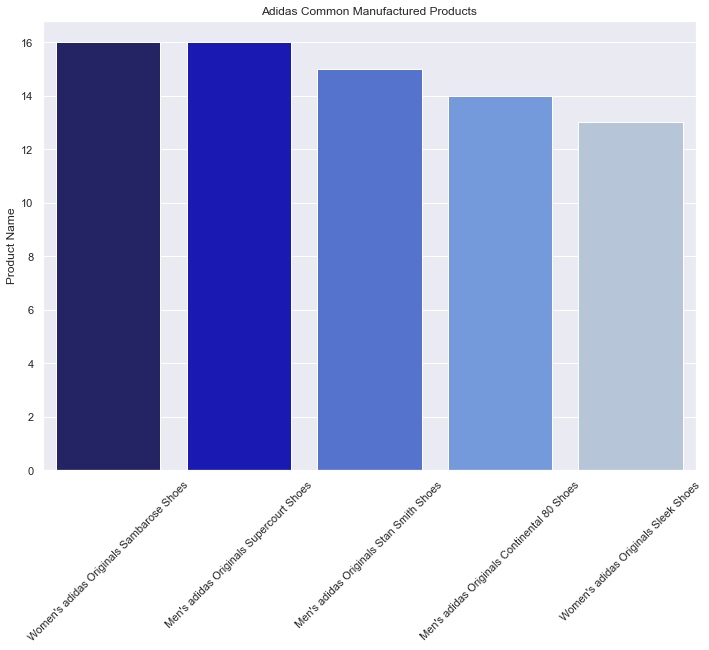

In [13]:
# Distribution of Adidas Common Manufactured Products
adidasProducts = adidas['Product Name'].value_counts().head()

cols = ['midnightblue','mediumblue', 'royalblue', 'cornflowerblue', 'lightsteelblue']

sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.barplot(adidasProducts.index, adidasProducts, palette = cols).tick_params(axis = 'x', rotation = 45)
plt.title('Adidas Common Manufactured Products')
sns.set_theme(style='whitegrid')

#### 3. Product Listing Price

##### a. Nike

C:\Users\Acer\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


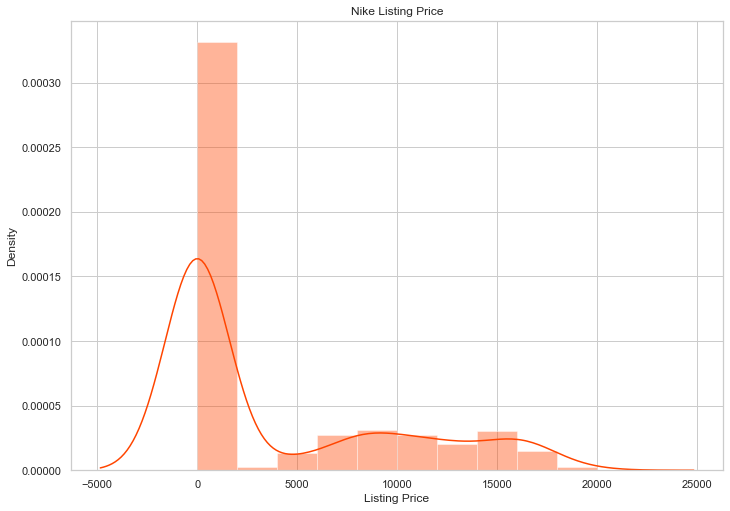

In [14]:
# Nike Listing Price
sns.distplot(nike['Listing Price'], bins = 10, color = 'orangered')
plt.title('Nike Listing Price')
sns.set_style('whitegrid')

##### b. Adidas

C:\Users\Acer\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


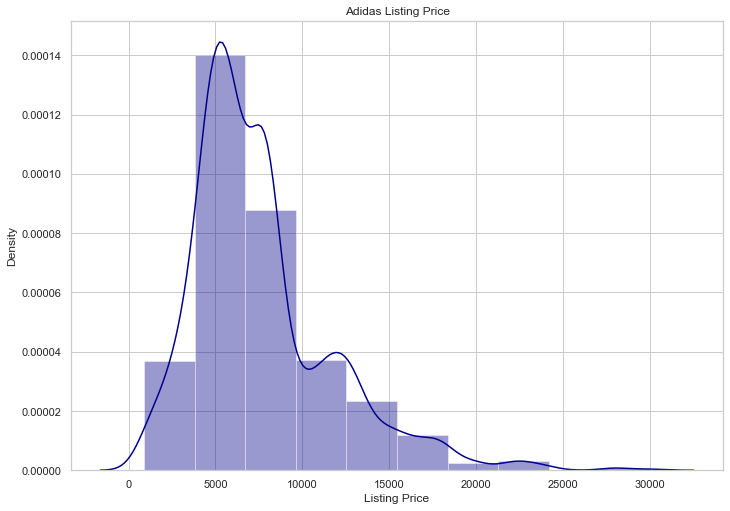

In [15]:
# Adidas Listing Price
sns.distplot(adidas['Listing Price'], bins = 10, color = 'darkblue')
plt.title('Adidas Listing Price')
sns.set_theme(style='whitegrid')

##### 4. Product Listing Price by Rating

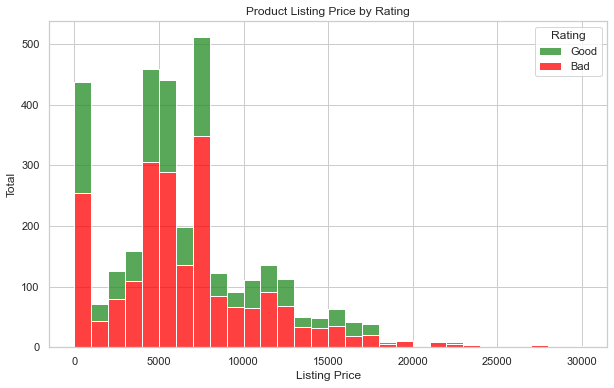

In [16]:
palette = ["forestgreen", "red"]
sns.set_palette(palette)

plt.figure(figsize = (10,6))
sns.histplot(data = nikeAdidas, x ="Listing Price", hue = "Rating", palette = palette, bins = 30, multiple = "stack")
plt.title("Product Listing Price by Rating")
plt.ylabel("Total")
plt.show()

##### 5. Product Sale Price by Rating

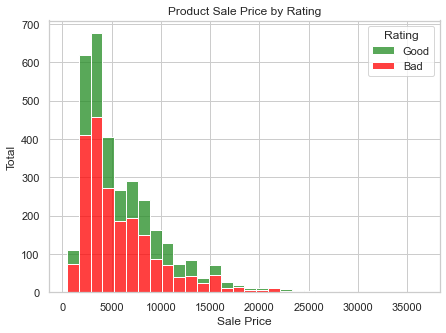

In [18]:
palette = ["forestgreen","red"]
sns.set_palette(palette)

plt.figure(figsize = (7,5))
sns.histplot(data = nikeAdidas, x = "Sale Price", hue ="Rating", palette = palette, bins = 30, multiple = "stack")
plt.title("Product Sale Price by Rating")
plt.ylabel("Total")
plt.show()

##### 6. Correlation Plot

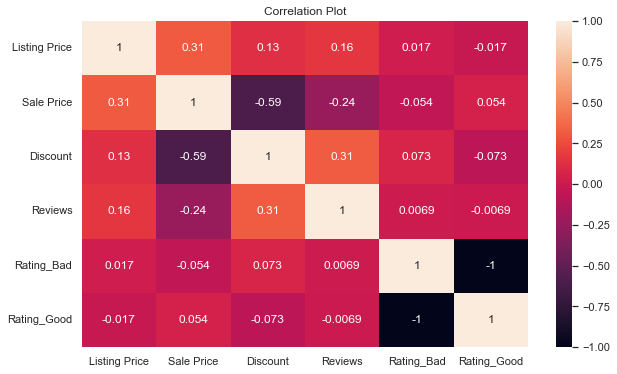

In [19]:
# Correlation Plot
plt.figure(figsize = (10,6))
sns.heatmap(data = pd.get_dummies(nikeAdidas).corr(), annot = True , cmap = "rocket")
plt.title("Correlation Plot")
plt.show()

##### 7. Pair Plots

<Figure size 1080x360 with 0 Axes>

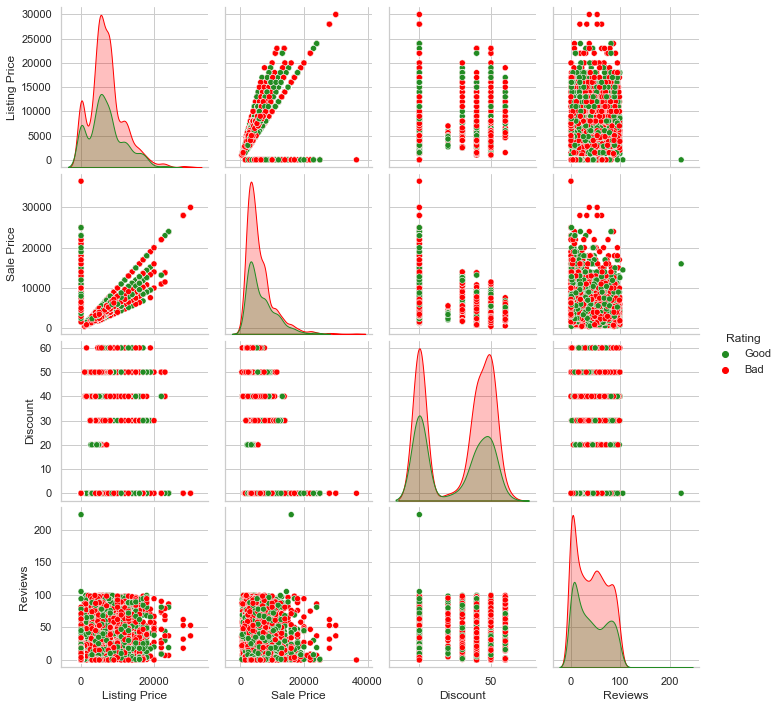

In [20]:
palette = ["forestgreen", "red"]
sns.set_palette(palette)

plt.figure(figsize = (15, 5))
sns.pairplot(data = nikeAdidas, hue = "Rating", palette = palette)
plt.show()

### Data Splitting

In [21]:
x = nikeAdidas.drop("Rating",axis = 1)
y = nikeAdidas["Rating"]

Adapun pendefinisian variabel x sebagai variabel independen yang berisi semua variabel yang memengaruhi variabel <i>Rating</i> seabagai variabel y yang merupakan variabel dependen.

In [22]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.30, random_state = 42)

Terdapat proses <i>data splitting</i> dimana 70% data diambil menjadi <i>training data</i> dan 30% data dijadikan sebagai <i>testing data</i>.

In [23]:
print("Training Data :", len(x_train))
print("Testing Data :", len(x_test))

Training Data : 2287
Testing Data : 981


### Data Standardization

In [24]:
scaler = StandardScaler()

scaled_x_train = scaler.fit_transform(x_train)
scaled_x_test = scaler.transform(x_test)

Adapun proses <i>data standardization</i> dikarenakan setiap variabel x memiliki skala angka yang berbeda. Oleh karena itu, nilai skala pada variabel x sebaiknya disamakan terlebih dahulu dengan fungsi <i>StandardScaler()</i>.

### Decision Tree

In [25]:
# Decision Tree Model Fit
dt = DecisionTreeClassifier(random_state = 42)
dt.fit(scaled_x_train, y_train)

DecisionTreeClassifier(random_state=42)

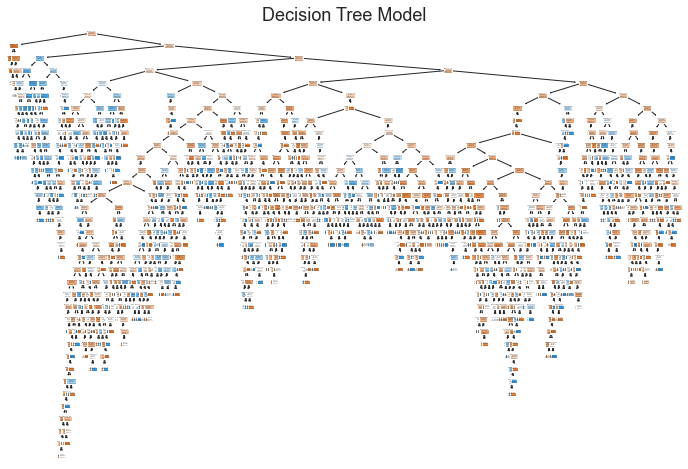

In [26]:
# Decision Tree Model Plot
plt.figure(figsize = (12, 8))
plot_tree(dt, filled = True, feature_names = x_train.columns)
plt.title("Decision Tree Model", fontsize = 18)
plt.show()

Berdasarkan model <i>Decision Tree</i> di atas, adapun data dengan jumlah yang banyak sehingga <i>node</i> yang dihasilkan akan menjadi banyak. Oleh sebab itu, visual yang ditampilkan pada <i>plot</i> menjadi kurang jelas.

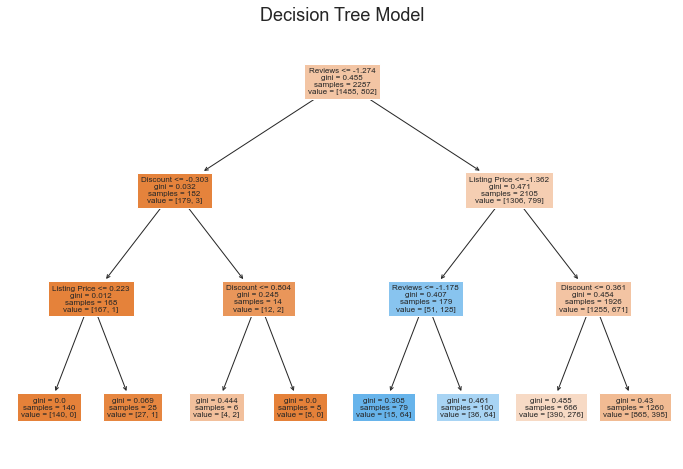

In [27]:
# Prunned Decision Tree Model Plot
simpleDt = DecisionTreeClassifier(max_depth = 3)
simpleDt.fit(scaled_x_train, y_train)

plt.figure(figsize = (12, 8))
plot_tree(simpleDt, filled = True, feature_names = x_train.columns, fontsize = 8)
plt.title("Decision Tree Model", fontsize = 18)
plt.show()

Dengan demikian, model Decision Tree akan disederhanakan guna memberikan tampilan <i>node</i> yang lebih jelas dengan menggunakan teknik <i>pruning</i>.

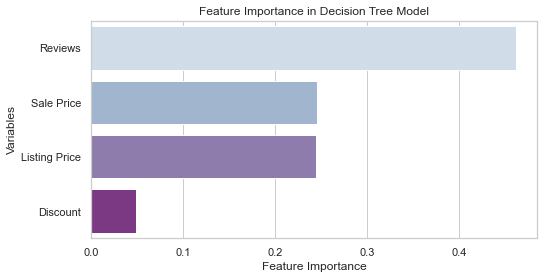

In [41]:
# Feature Importance in Decision Tree Model
dt_feature = pd.DataFrame({"Variables": x_train.columns, "Feature Importance": dt.feature_importances_})
dt_feature = dt_feature.sort_values(['Feature Importance'], ascending = False)

plt.figure(figsize = (8, 4))
sns.barplot(data = dt_feature, x = "Feature Importance", y = "Variables", palette = "BuPu")
plt.title("Feature Importance in Decision Tree Model")
plt.show()

In [29]:
# Decision Tree Model Prediction
dt_predict = dt.predict(scaled_x_test)

print(classification_report(y_test, dt_predict))
#print("Accuracy:", metrics.accuracy_score(y_test, dt_predict))

              precision    recall  f1-score   support

         Bad       0.69      0.69      0.69       634
        Good       0.44      0.44      0.44       347

    accuracy                           0.60       981
   macro avg       0.56      0.56      0.56       981
weighted avg       0.60      0.60      0.60       981



In [30]:
# Actual vs Predicted in Decision ree Model
pd.DataFrame({"Actual": y_test,"Predicted": dt_predict}).reset_index(drop = True)

,Actual,Predicted
0,Bad,Bad
1,Good,Good
2,Good,Good
3,Bad,Good
4,Bad,Good
...,...,...
976,Bad,Bad
977,Good,Bad
978,Bad,Bad
979,Bad,Good


C:\Users\Acer\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


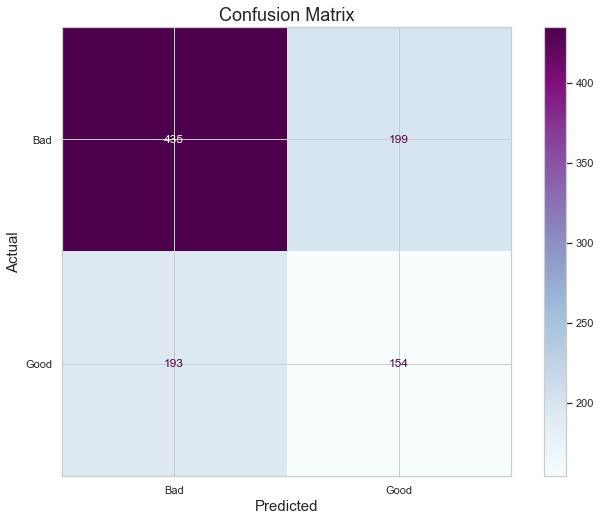

In [31]:
# Confusion Matrix in Decision Tree Model
plot_confusion_matrix(dt, scaled_x_test, y_test, cmap="BuPu")
plt.title('Confusion Matrix', fontsize = 18)
plt.xlabel('Predicted', fontsize = 15)
plt.ylabel('Actual', fontsize = 15)
plt.show()

### Random Forest

In [32]:
# Finding the Optimal Number of Trees
rf_error = []

for n in range(1 , 41):
    rf = RandomForestClassifier(n_estimators = n, random_state = 42)
    rf.fit(scaled_x_train, y_train)
    rf_predict = rf.predict(scaled_x_test)
    rf_error.append(1 - accuracy_score(rf_predict, y_test))

Terdapat pencarian jumlah <i>tree</i> yang paling optimal berupa jumlah <i>tree</i> dengan nilai <i>error</i> terkecil. Pencarian ini melibatkan penggunaan fungsi dengan <i>for looping</i> untuk membandingkan nilai <i>error</i> dari jumlah <i>tree</i> 1 hingga 40.

Pencarian ini dilakukan karena <i>Random Forest</i> merupakan hutan dari <i>Decision Tree</i> sehingga jumlah <i>tree</i>nya lebih banyak dibandingkan <i>Decision Tree</i>.

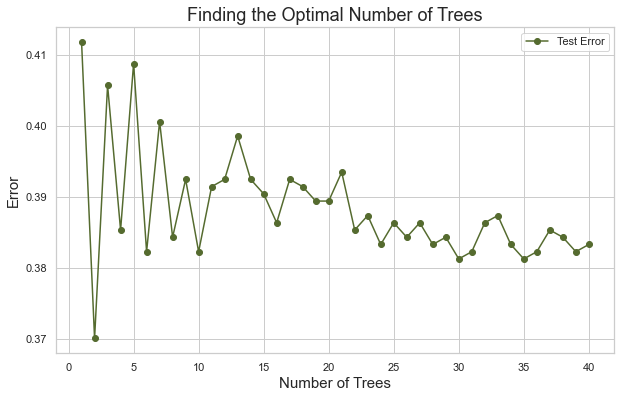

In [33]:
# Finding the Optimal Number of Trees Plot
plt.figure(figsize=(10,6))

plt.plot(range(1, 41), rf_error, label = 'Test Error', color = "darkolivegreen", marker = "o")
plt.title("Finding the Optimal Number of Trees", fontsize = 18)
plt.xlabel("Number of Trees", fontsize = 15)
plt.ylabel("Error", fontsize = 15)
plt.legend()
plt.show()

Berdasarkan <i>plot</i> di atas, maka dapat terlihat bahwa jumlah <i>tree</i> 2 memiliki nilai <i>error</i> terkecil sehingga jumlah <i>tree</i> tersebut akan digunakan.

Oleh karena <i>Random Forest</i> menampilkan <i>tree</i> dalam jumlah yang banyak, maka hal ini menjadi kurang efektif dalam menampilkan visualnya dikarenakan akan memakan waktu yang lama.

In [34]:
# Random Forest Model Fit
rf = RandomForestClassifier(n_estimators = 2,random_state = 42)
rf.fit(scaled_x_train, y_train)

RandomForestClassifier(n_estimators=2, random_state=42)

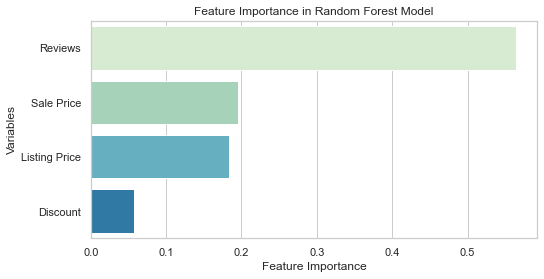

In [40]:
# Feature Importance in Random Forest Model
rf_feature = pd.DataFrame({"Variables": x_train.columns, "Feature Importance": rf.feature_importances_})
rf_feature = rf_feature.sort_values(['Feature Importance'],ascending = False)

plt.figure(figsize = (8,4))
sns.barplot(data = rf_feature, x = "Feature Importance", y ="Variables", palette = "GnBu")
plt.title("Feature Importance in Random Forest Model")
plt.show()

In [36]:
# Random Forest Model Prediction
rf_predict = rf.predict(scaled_x_test)

print(classification_report(y_test, rf_predict))
#print("Accuracy:", metrics.accuracy_score(y_test, rf_predict))

              precision    recall  f1-score   support

         Bad       0.68      0.81      0.74       634
        Good       0.47      0.31      0.37       347

    accuracy                           0.63       981
   macro avg       0.57      0.56      0.55       981
weighted avg       0.60      0.63      0.61       981



In [37]:
# Actual vs Predicted on Random Forest Model
pd.DataFrame({"Actual": y_test,"Predicted": rf_predict}).reset_index(drop = True)

,Actual,Predicted
0,Bad,Bad
1,Good,Bad
2,Good,Bad
3,Bad,Good
4,Bad,Bad
...,...,...
976,Bad,Bad
977,Good,Bad
978,Bad,Bad
979,Bad,Bad


C:\Users\Acer\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


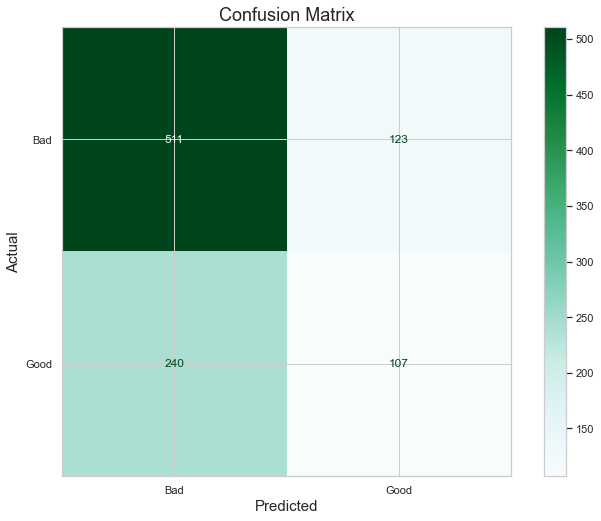

In [38]:
# Confusion Matrix in Random Forest Model
plot_confusion_matrix(rf, scaled_x_test, y_test, cmap = "BuGn")
plt.title('Confusion Matrix', fontsize = 18)
plt.xlabel('Predicted', fontsize = 15)
plt.ylabel('Actual', fontsize = 15)
plt.show()

### Evaluation

In [39]:
accuracy = []

for i in [dt_predict, rf_predict]:
    accuracy.append(accuracy_score(y_test,i))
    
print("============== ACCURACY ==============\n")
print(f"Decision Tree Model Accuracy\t: {round(accuracy[0] * 100)}%")
print(f"Random Forest Model Accuracy\t: {round(accuracy[1] * 100)}%")

============== ACCURACY ==============

Decision Tree Model Accuracy	: 60%
Random Forest Model Accuracy	: 63%


Adapun tahap evaluasi yang melibatkan perbandingan pada kedua model yang dibuat, yaitu model <i>Decision Tree</i> dan <i>Random Forest</i>. 

Berdasarkan tingkat akurasi pada kedua model yang telah dibuat, maka dapat dilihat bahwa model <i>Random Forest</i> merupakan model dengan akurasi tertinggi sebesar 63%.

### Conclusion

Dengan demikian, maka dapat disimpulkan bahwa terdapat berbagai fitur yang penting dalam mata pelanggan berupa <i>rating</i>, <i>sales price</i>, dan <i>listing price</i>. Hal ini dikarenakan <i>rating</i> adalah kolom yang jarang memiliki nilai <i>null</i>. Dengan kata lain, terdapat hampir seluruh pembeli memberikan <i>rating</i> pada setiap pembeliannya. Selain itu, <i>listing price</i> dan <i>sale price</i> memiliki pengaruh pembelian yang cukup tinggi karena terhadap seberapa tinggi kemampuan pembelian yang ada.

Tidak hanya itu saja, hasil evaluasi telah mengatakan bahwa model <i>Random Forest</i> memiliki tingkat akurasi tertinggi, namun model <i>Random Forest<i/> memiliki akar yang kurang baik dalam penentuan suatu keputusan. Oleh karena itu, adapun metode lain yang akan digunakan berupa metode <i>Decision Tree</i> dengan akurasi yang memiliki selisih tidak beda jauh dari <i>Random Forest</i>.